In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from exo_dmc_custom import *

In [2]:
obj = pd.read_pickle("C:/Users/bryce/Downloads/F150_lim.pkl")

In [13]:
print(obj.keys())
obj['MGroup']
BPIC_list = []
TWa_list = []
for i in range(len(obj['MGroup'])):
    if obj['MGroup'][i] == 'BPIC':
        BPIC_list.append(i)
    if obj['MGroup'][i] == 'TWA':
        TWa_list.append(i)
print(BPIC_list)
print(TWa_list)
dist = []
for i in range(len(TWa_list)):
    dist.append((obj['ID'][TWa_list[i]]))
print(dist)
TWa_list = TWa_list[0:3]
star_list = BPIC_list + TWa_list
print(star_list)


dict_keys(['ID', 'Mstar', 'dist', 'MGroup', 'xlim', 'ylim'])
[3, 21, 25, 26, 31, 103, 106, 107, 108, 109, 110, 111, 112, 118, 119, 122, 126, 129, 140, 141]
[55, 58, 70, 115]
['TWA_6', 'CE_Ant', 'HIP_61498', 'HIP_93747']
[3, 21, 25, 26, 31, 103, 106, 107, 108, 109, 110, 111, 112, 118, 119, 122, 126, 129, 140, 141, 55, 58, 70]


Text(0.5, 1.0, 'Histogram showing the H band magnidues of 32 Target Stars')

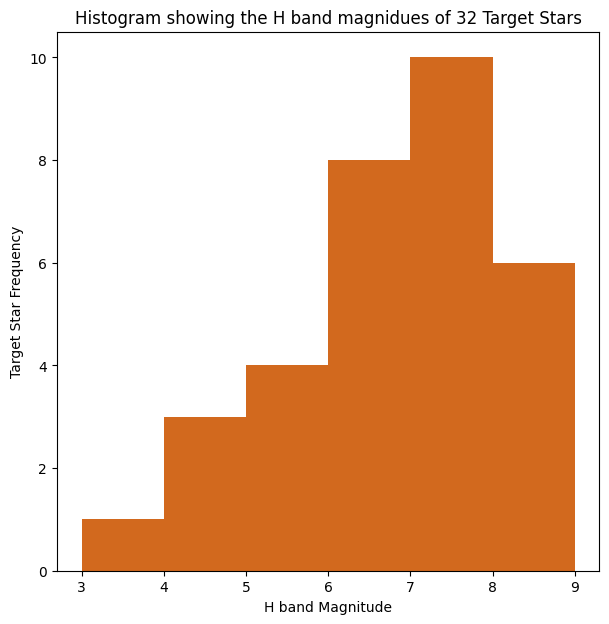

In [27]:
mag_list = [7.93,
4.77,
6.45,
6.429,
3.544,
7.462,
7.092,
6.022,
7.198,
4.251,
8.047,
7.667,
6.486,
5.98,
5.148,
8.027,
8.461,
4.831,
7.123,
7.154,
8.18,
7.125,
5.794,
6.77,
8.766,
6.019,
6.984,
5.9,
7.767,
7.504,
8.025,
6.987]

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)
ax.hist(mag_list, bins = [3,4,5,6,7,8,9], color = 'chocolate')
ax.set_xlabel('H band Magnitude')
ax.set_ylabel('Target Star Frequency')
ax.set_title('Histogram showing the H band magnidues of 32 Target Stars')

SHINE Detection Probability for 2MASS_J00172353-6645124 time elapsed - 00:00:03.15
SHINE Detection Probability for HIP_21547 time elapsed - 00:00:03.01
SHINE Detection Probability for HIP_23200 time elapsed - 00:00:03.12
SHINE Detection Probability for HIP_23309 time elapsed - 00:00:02.78
SHINE Detection Probability for HIP_27321 time elapsed - 00:00:02.83
SHINE Detection Probability for TYC_8728_2262_1 time elapsed - 00:00:02.89
SHINE Detection Probability for HIP_86598 time elapsed - 00:00:02.84
SHINE Detection Probability for HIP_88399 time elapsed - 00:00:02.80
SHINE Detection Probability for HIP_89829 time elapsed - 00:00:03.09
SHINE Detection Probability for HIP_92024 time elapsed - 00:00:02.89
SHINE Detection Probability for TYC_9073_0762_1 time elapsed - 00:00:02.96
SHINE Detection Probability for TYC_7408_0054_1 time elapsed - 00:00:02.95
SHINE Detection Probability for HIP_92680 time elapsed - 00:00:02.75
SHINE Detection Probability for HIP_95261 time elapsed - 00:00:02.81
SH

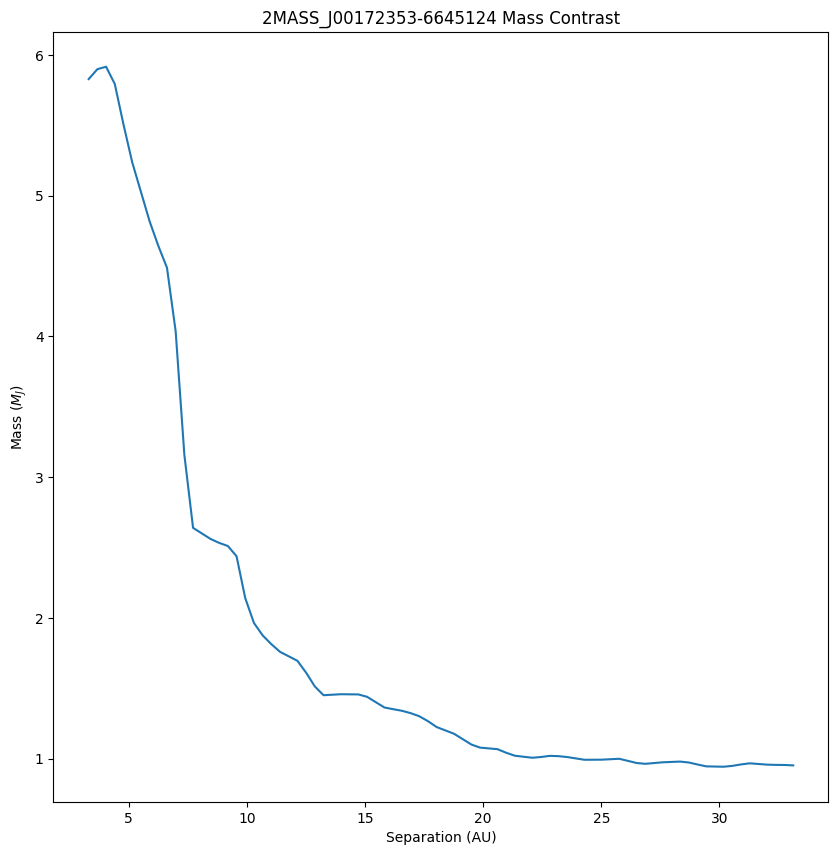

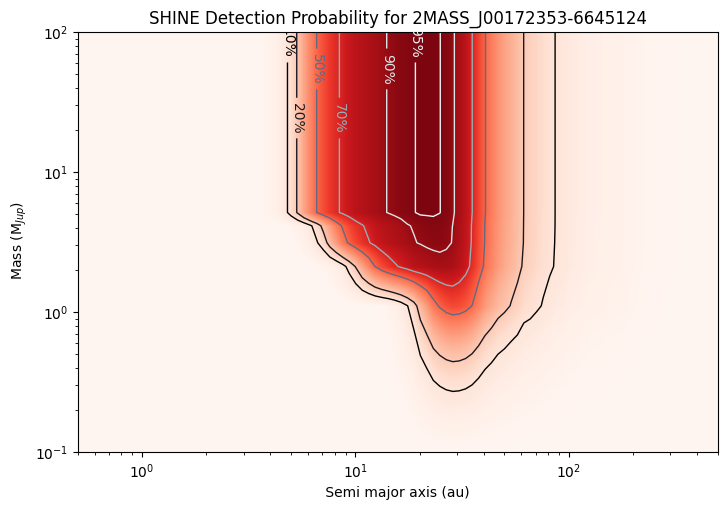

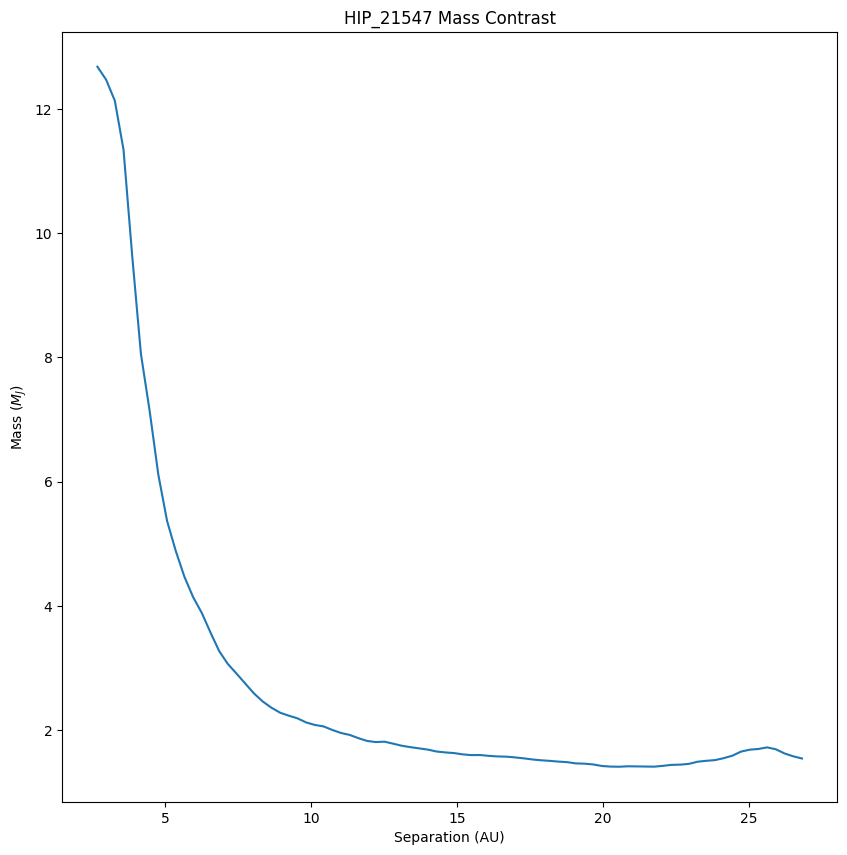

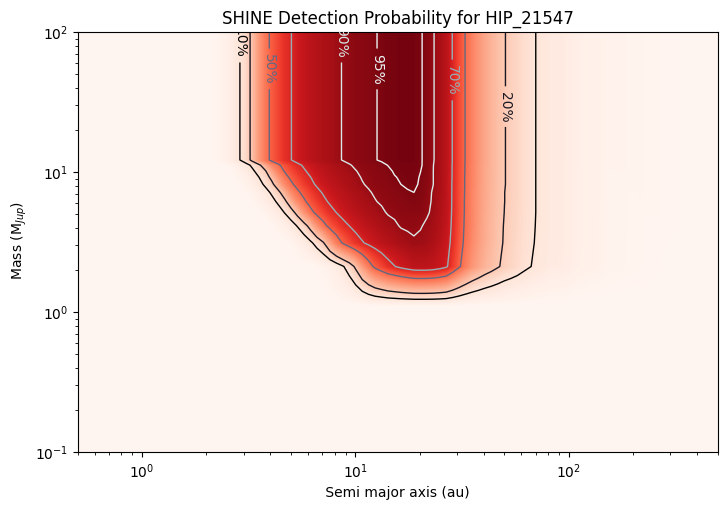

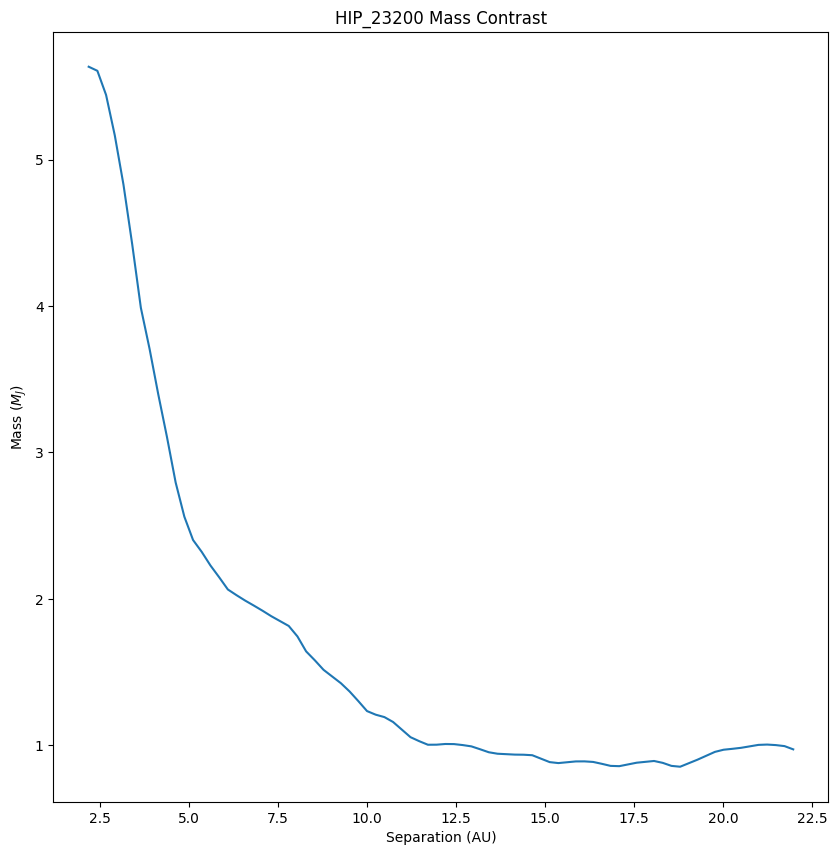

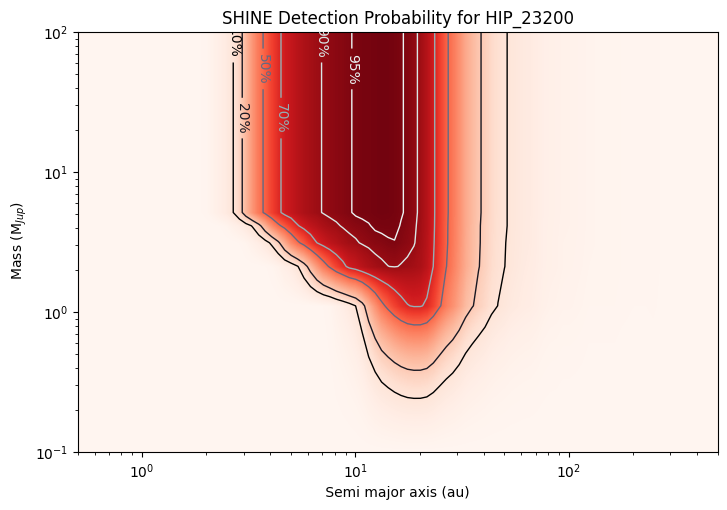

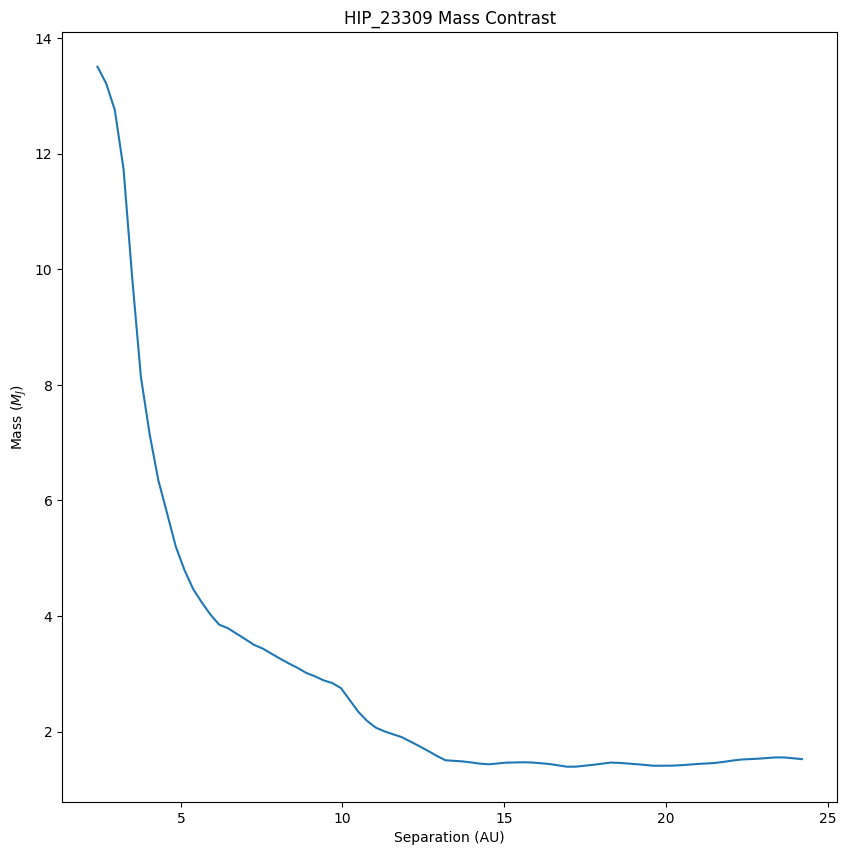

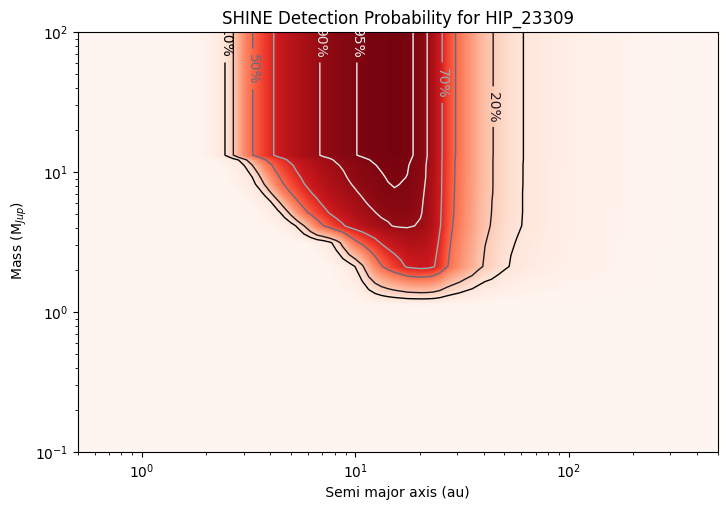

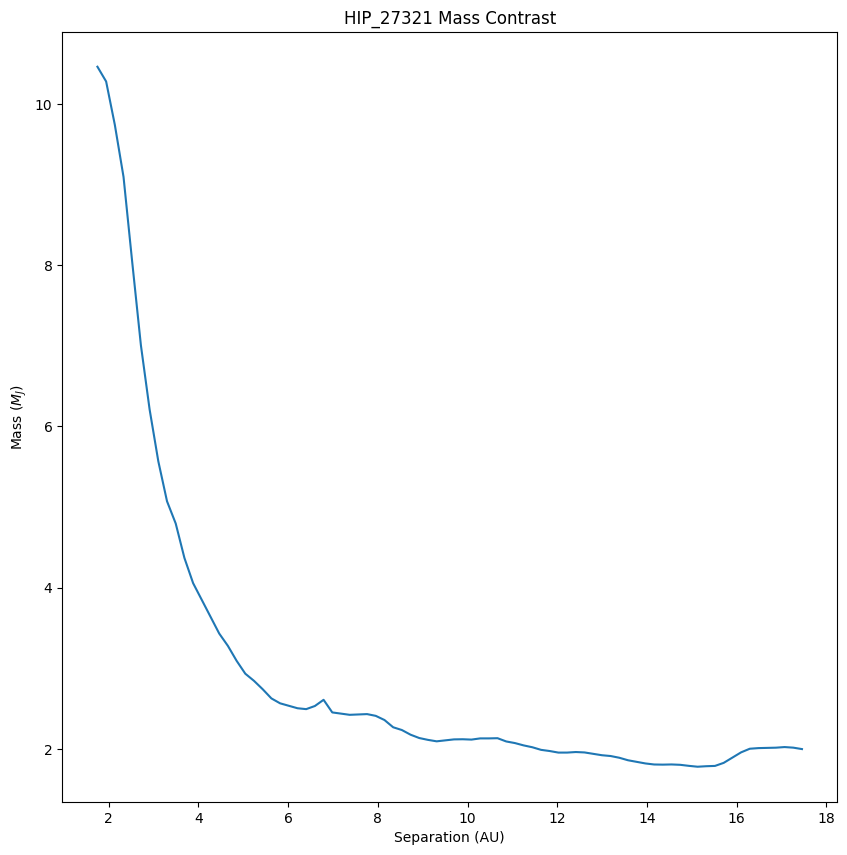

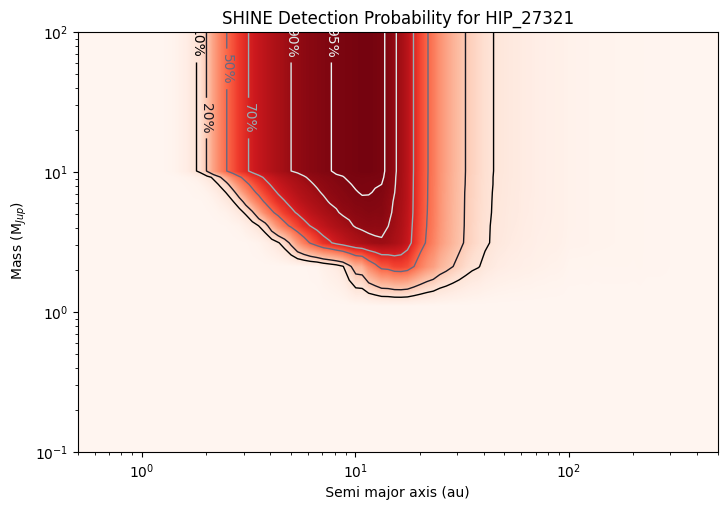

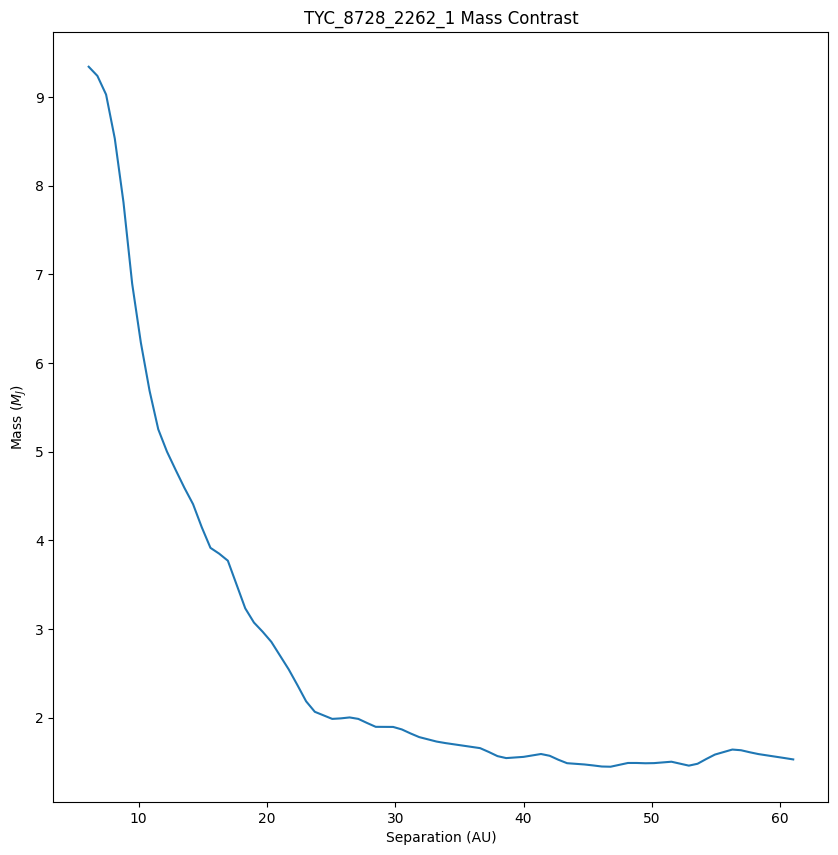

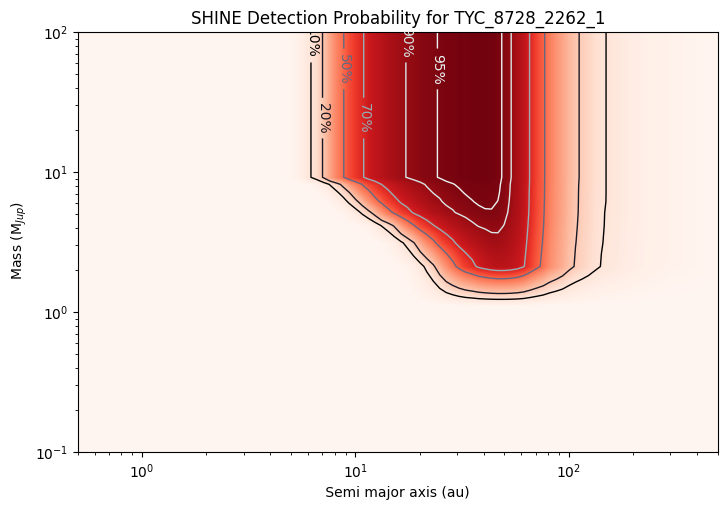

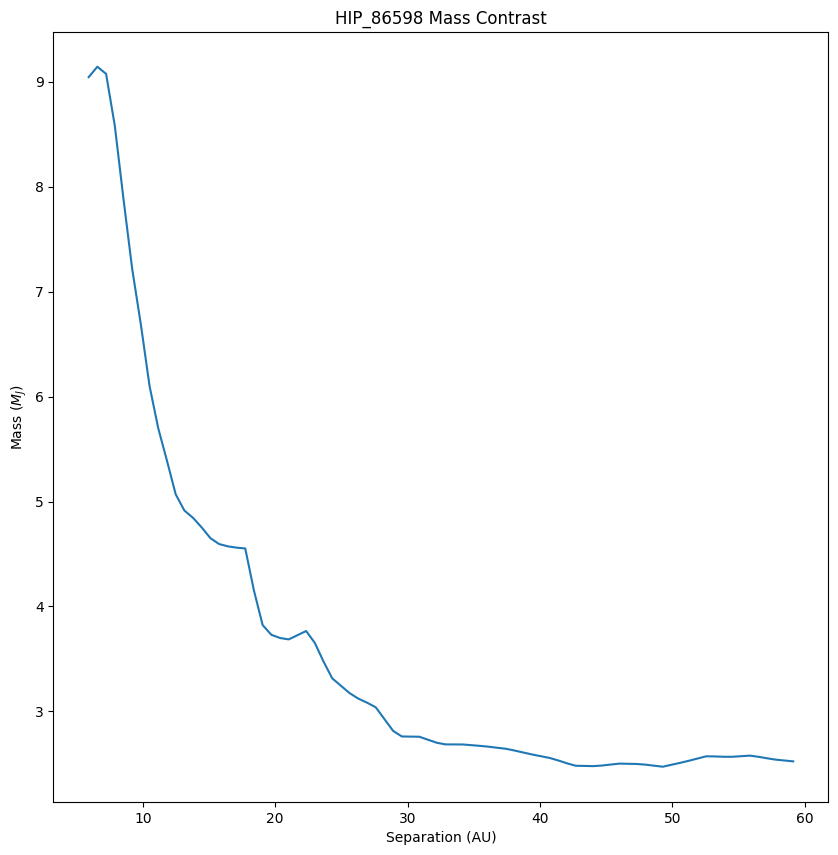

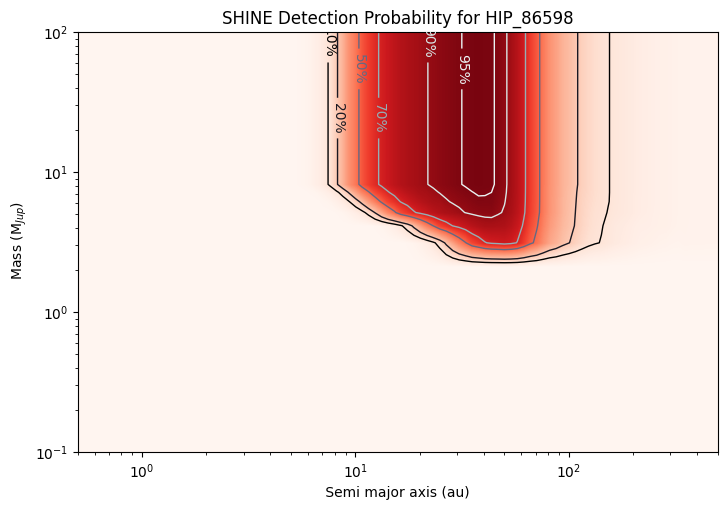

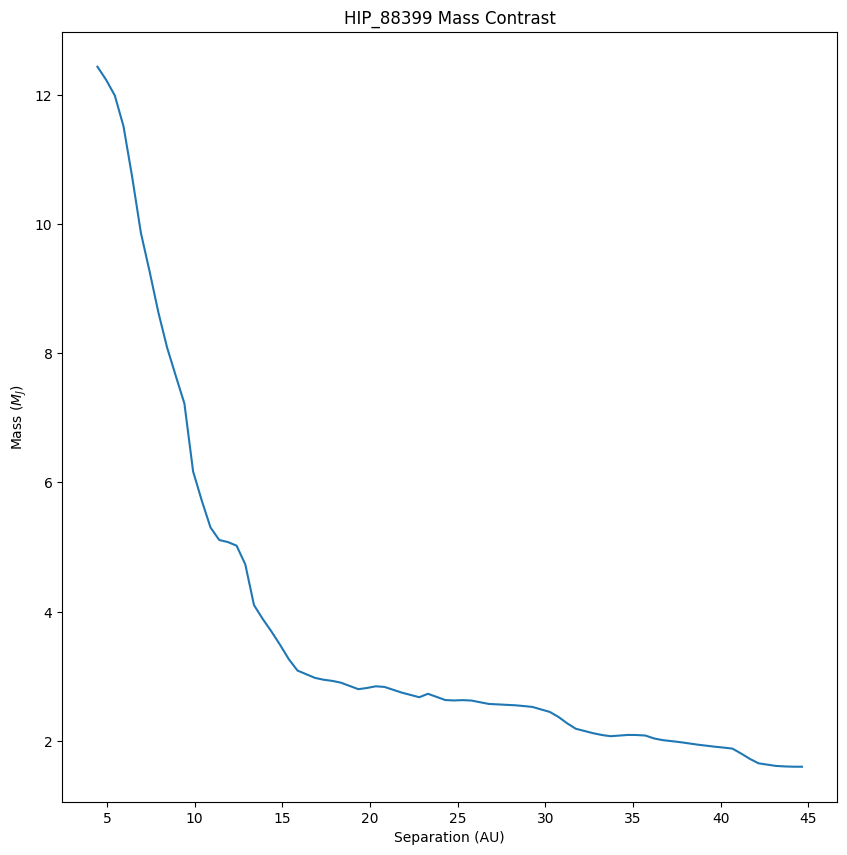

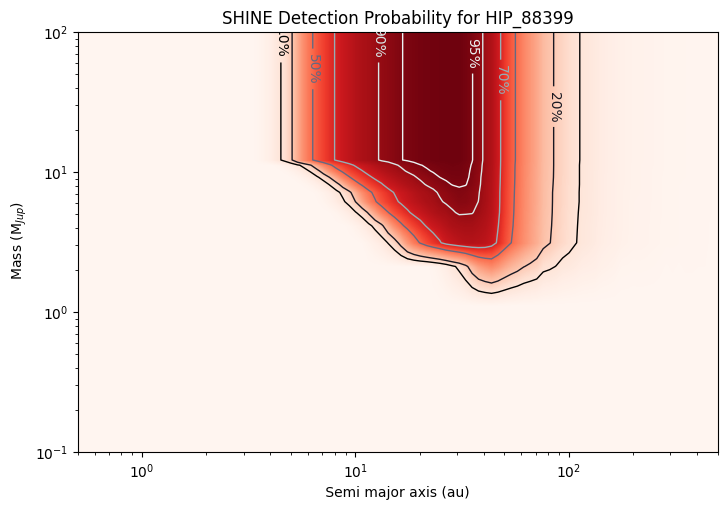

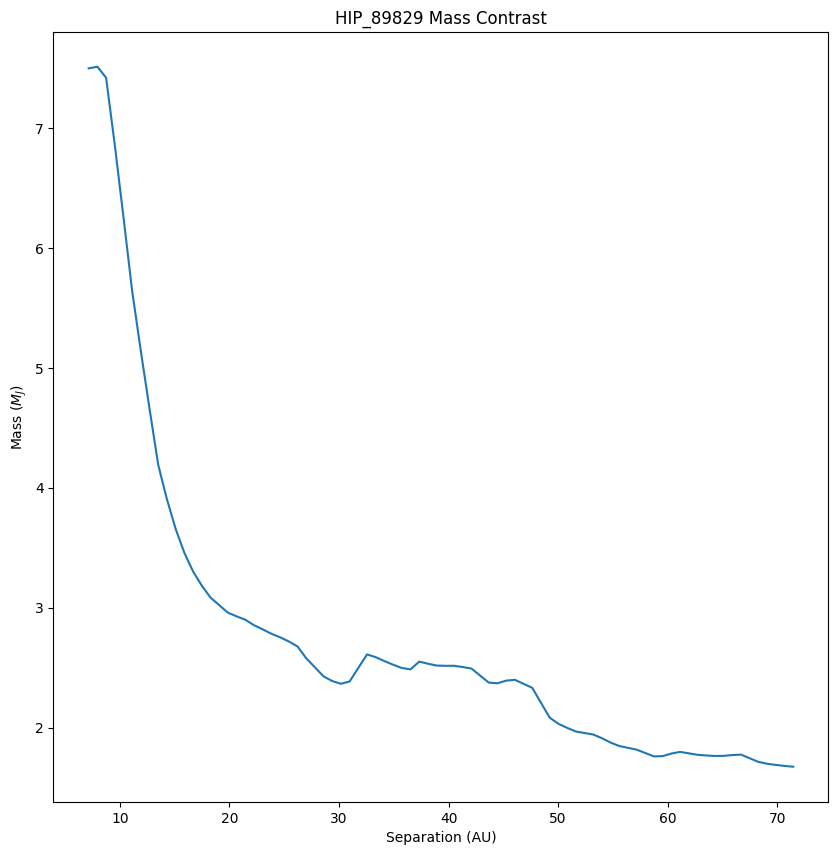

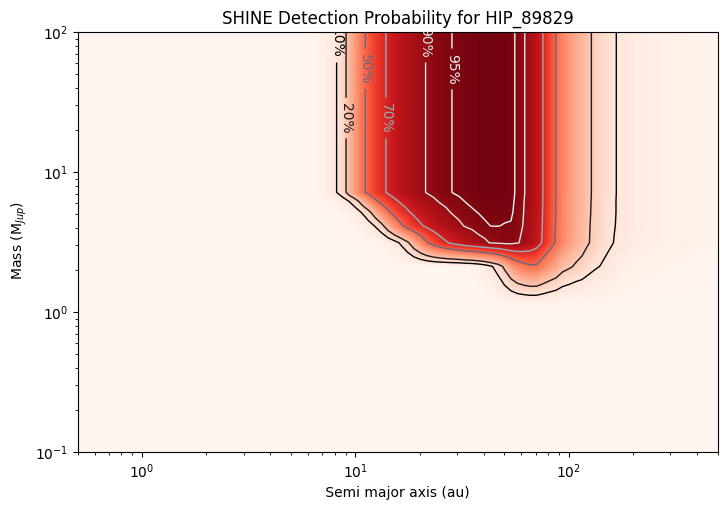

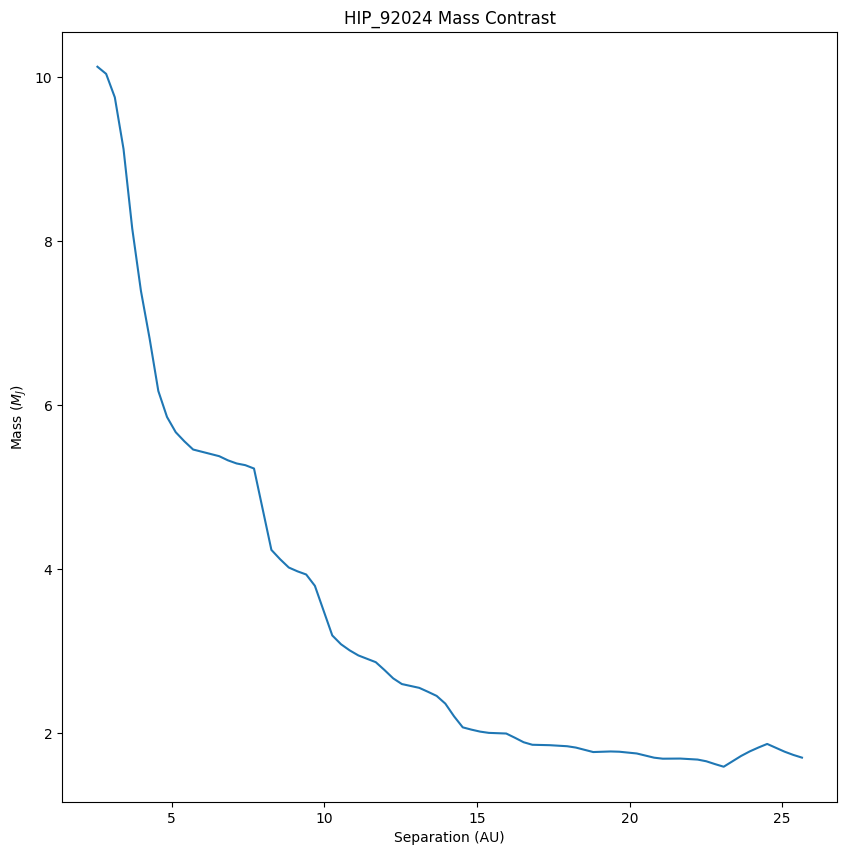

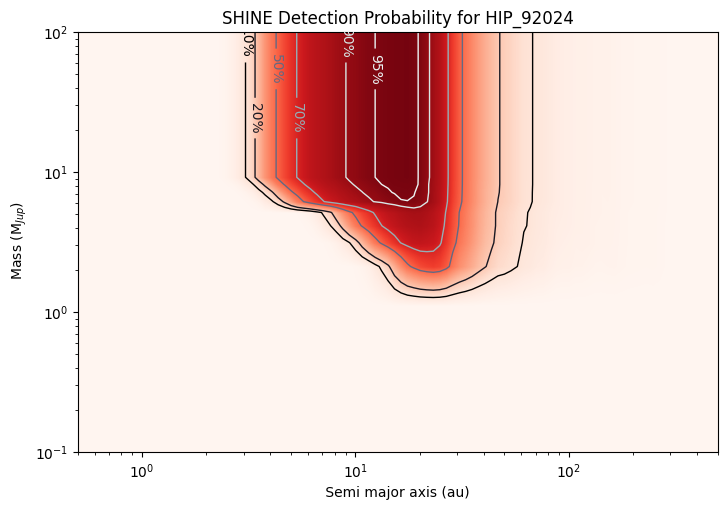

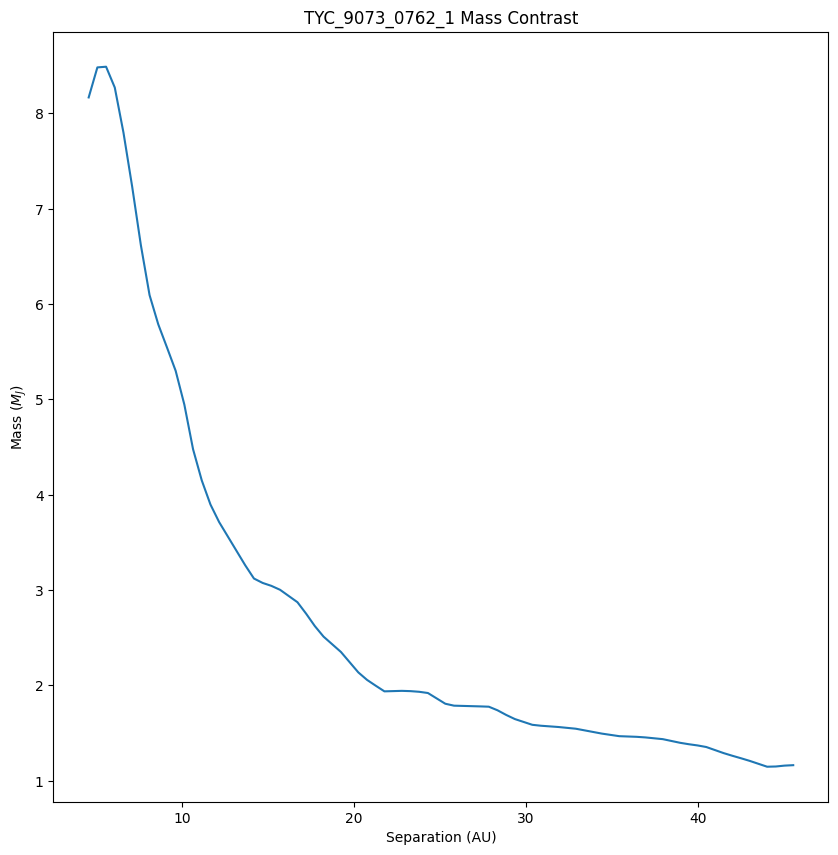

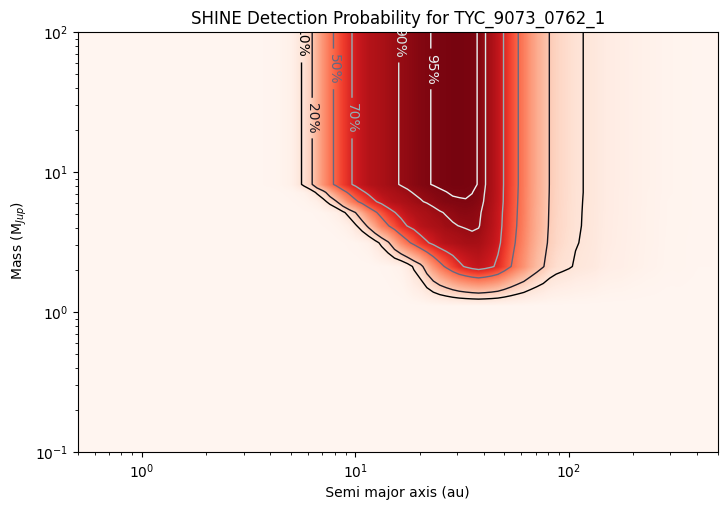

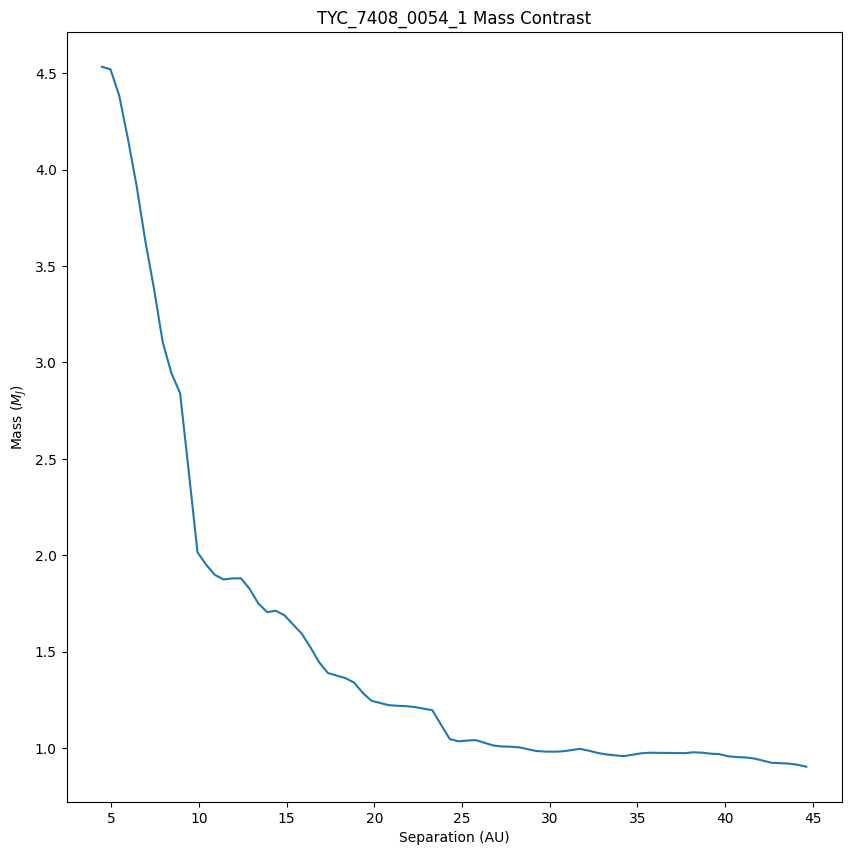

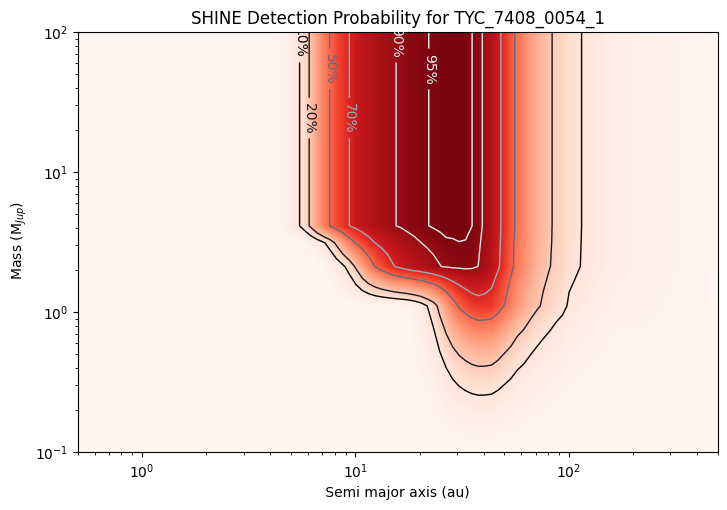

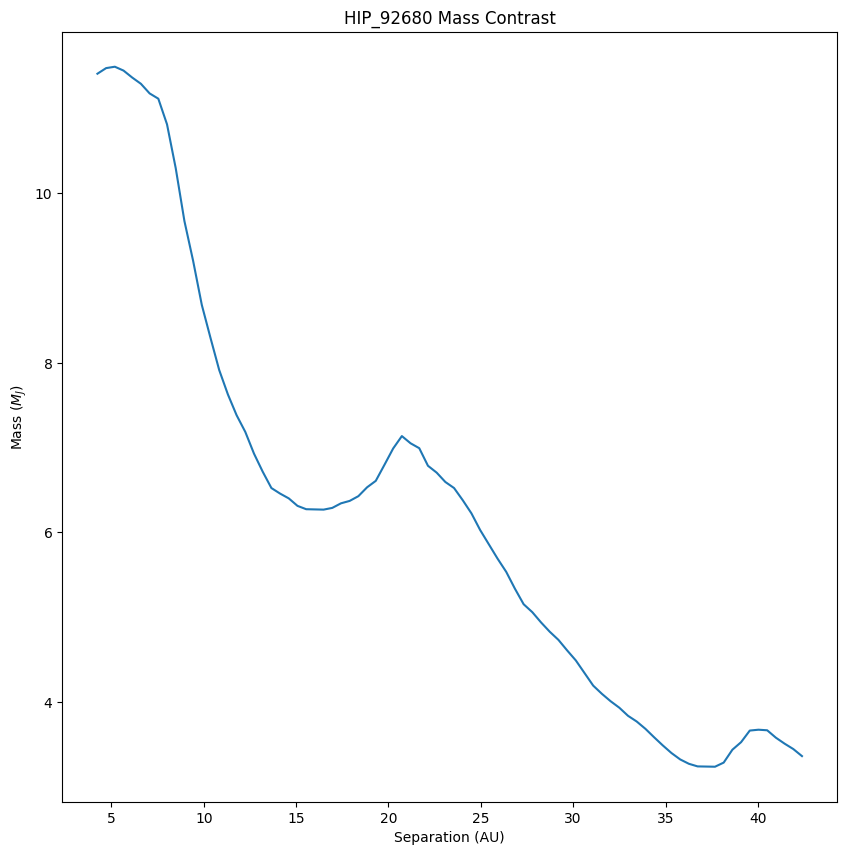

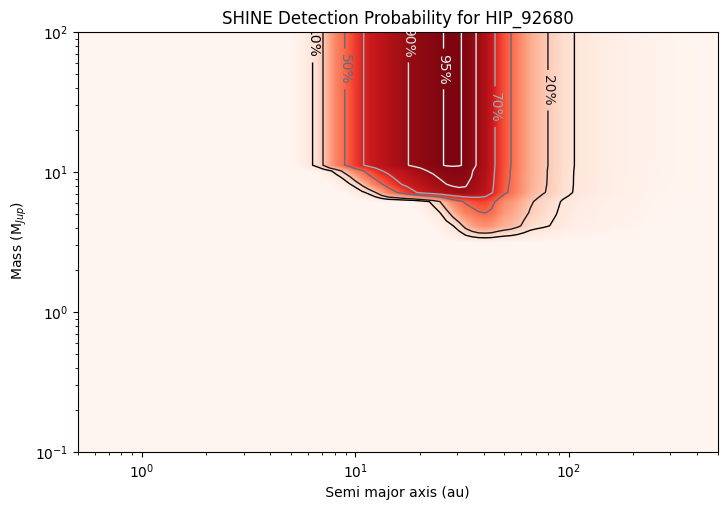

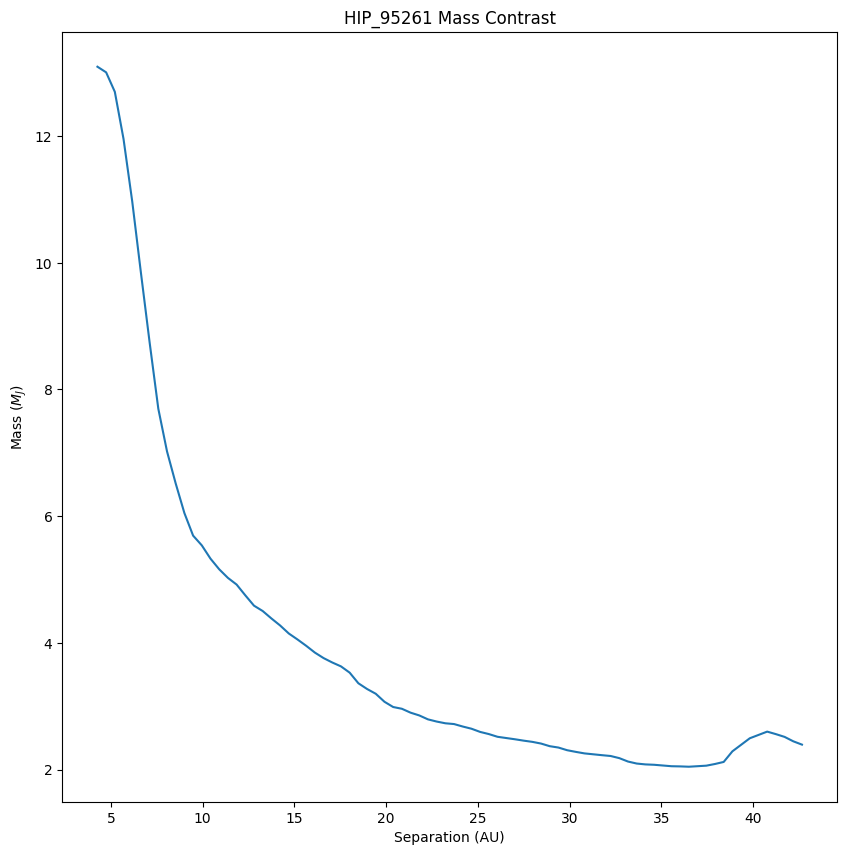

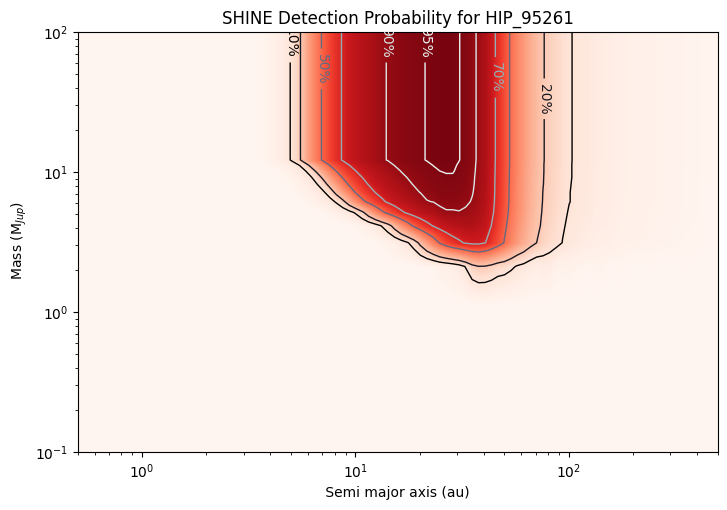

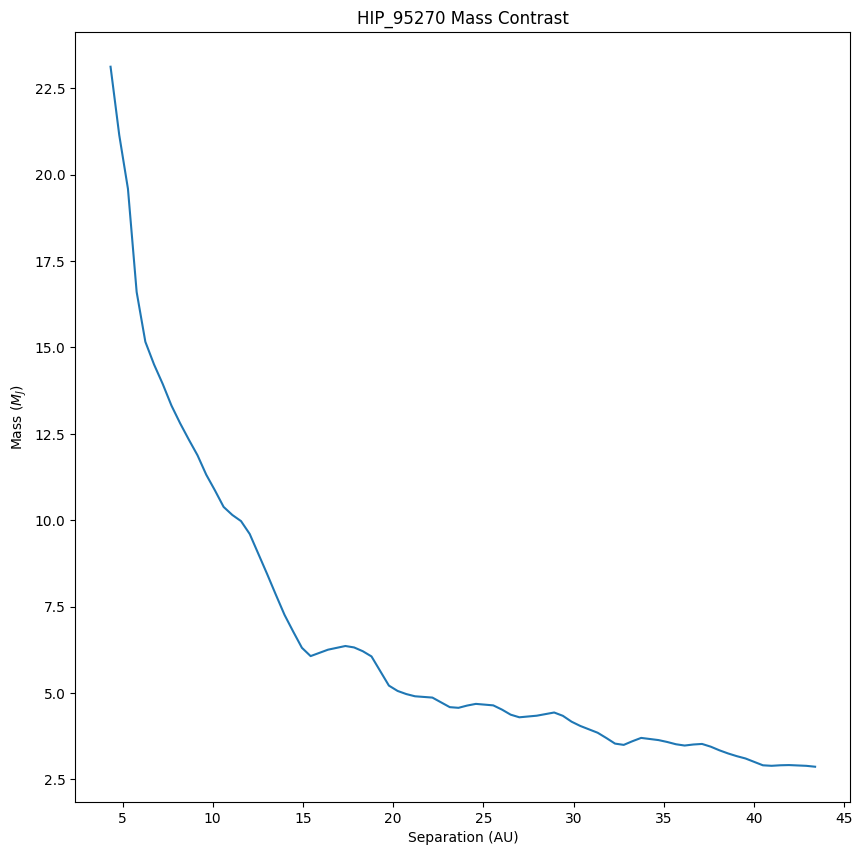

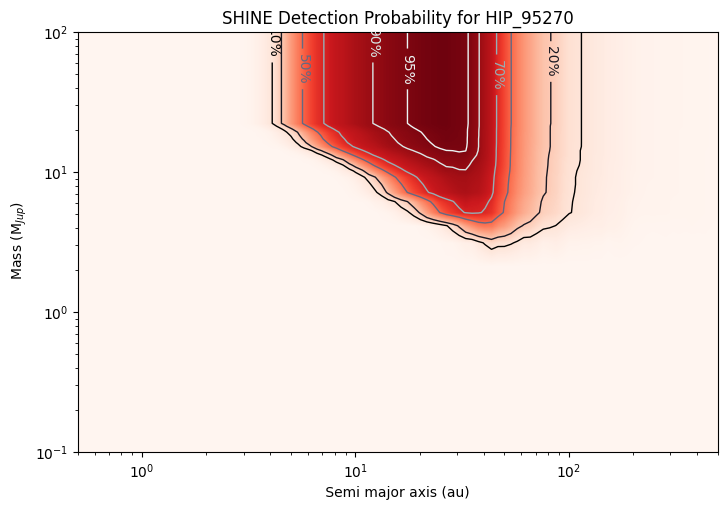

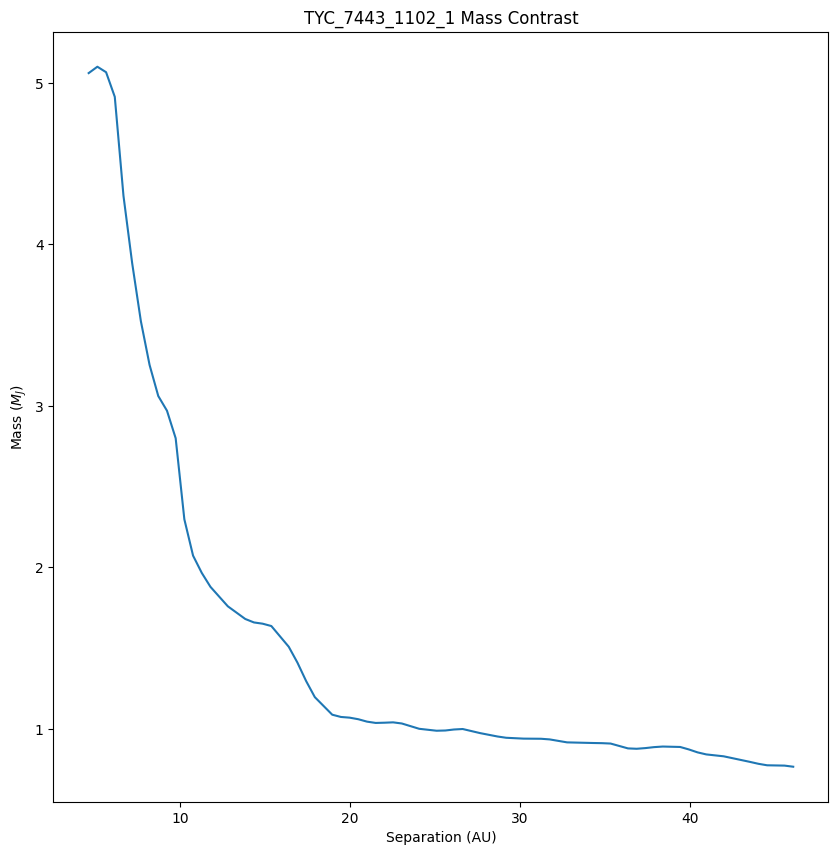

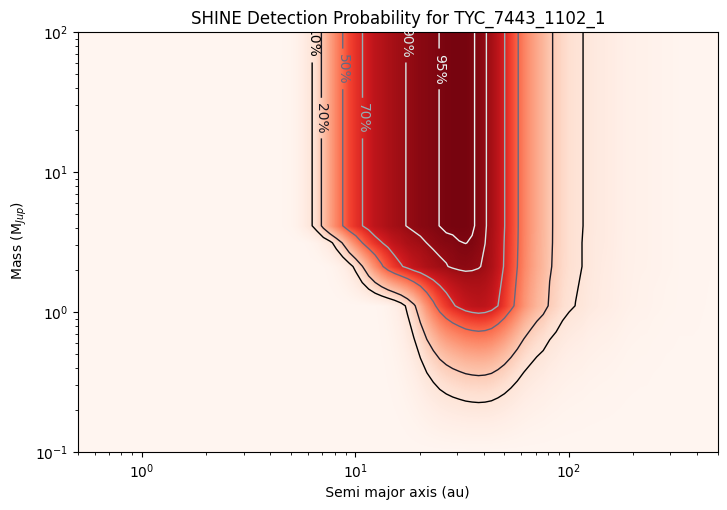

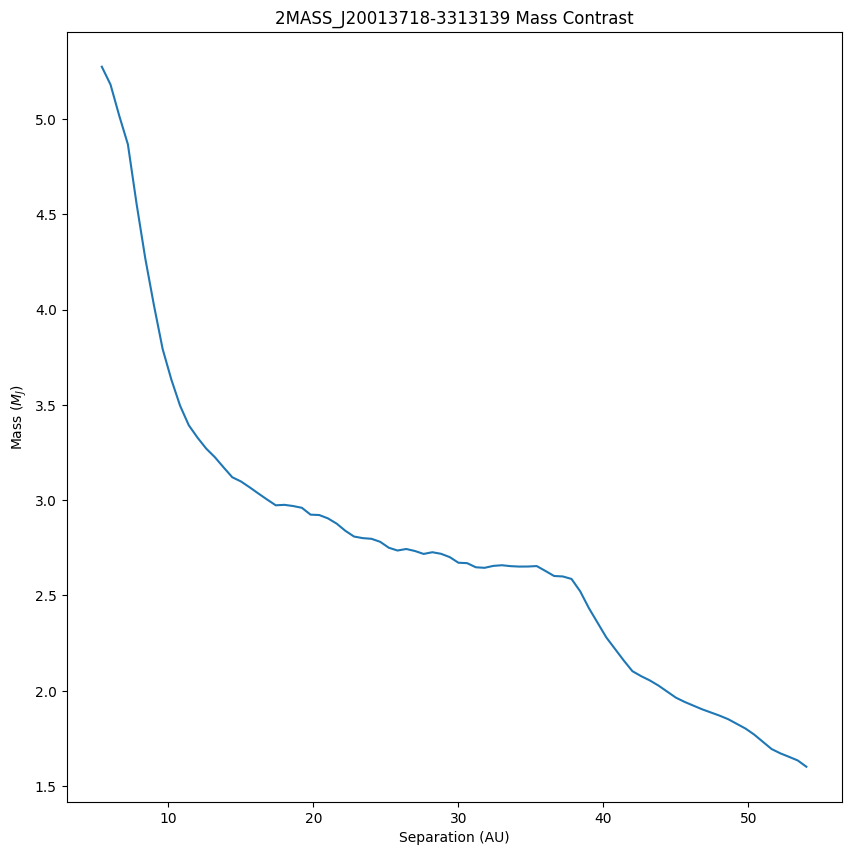

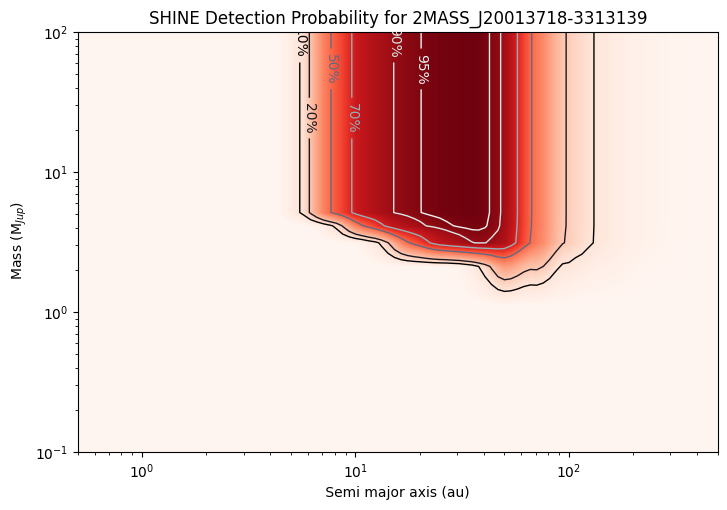

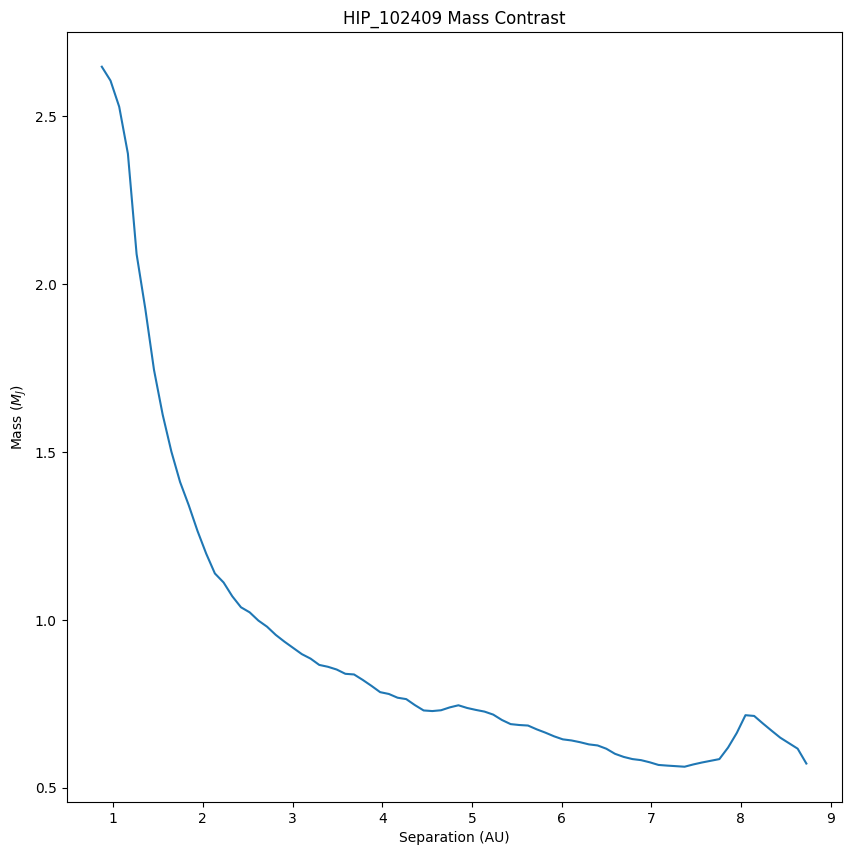

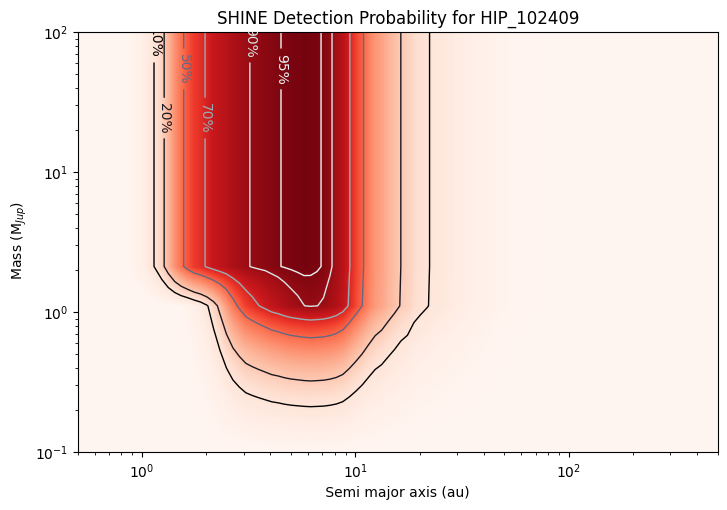

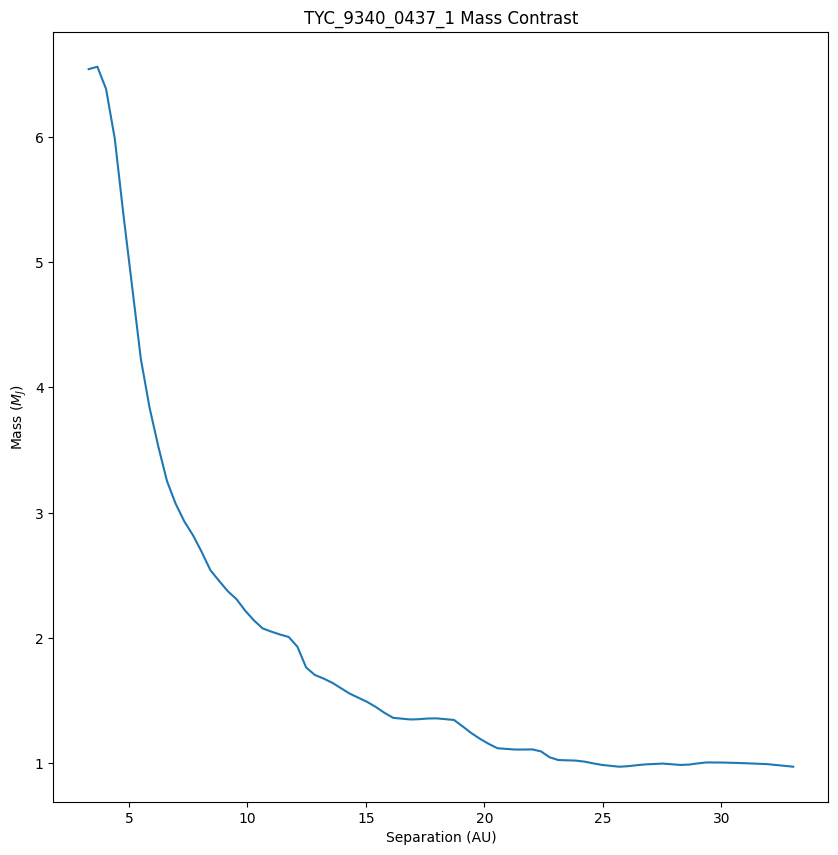

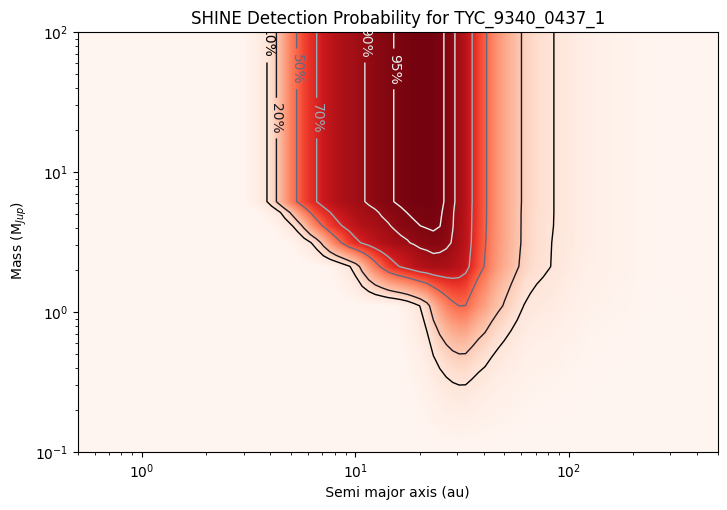

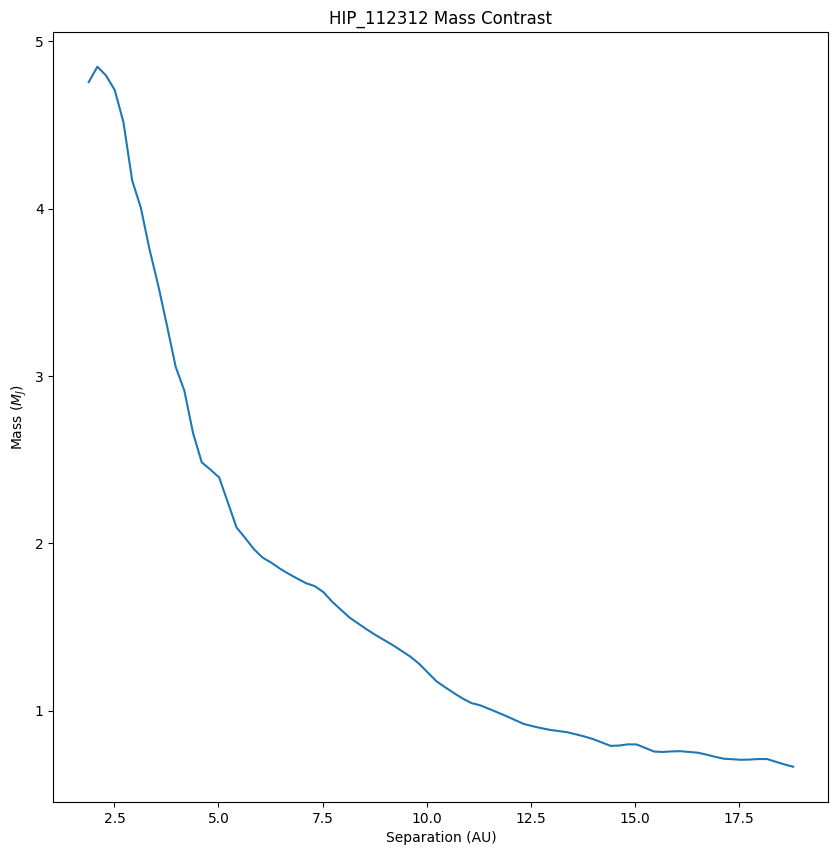

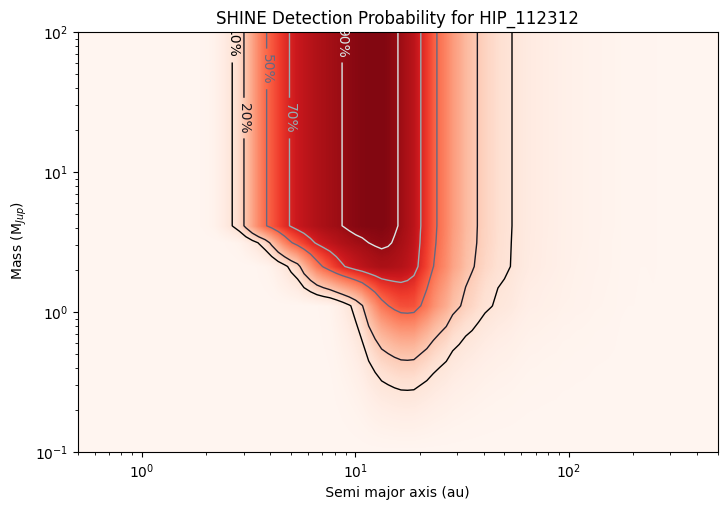

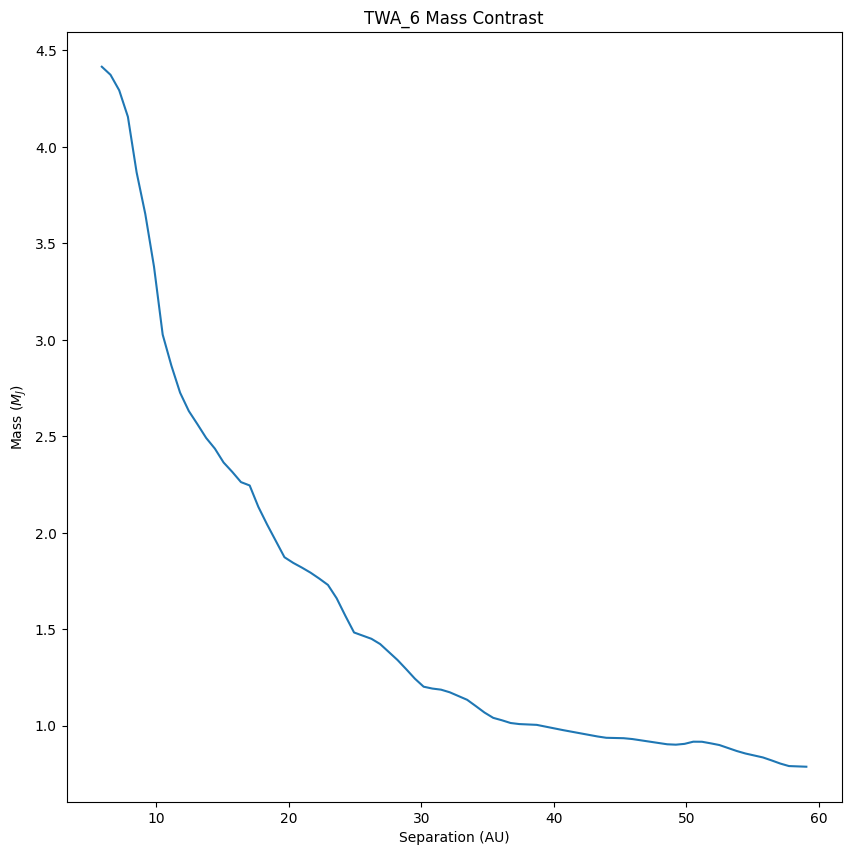

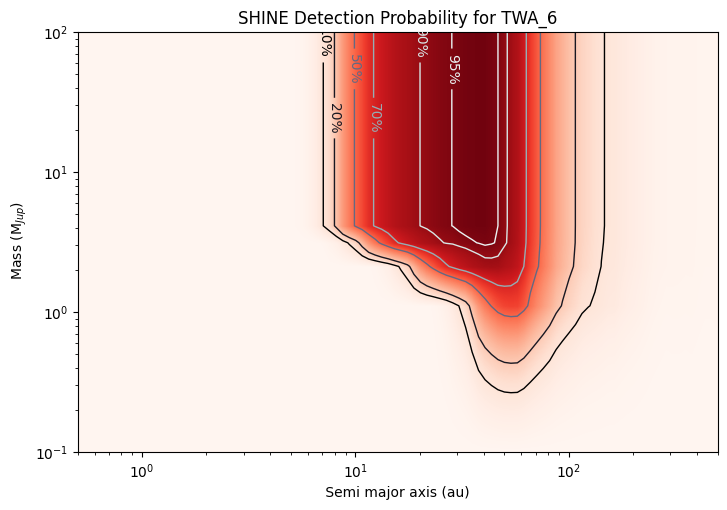

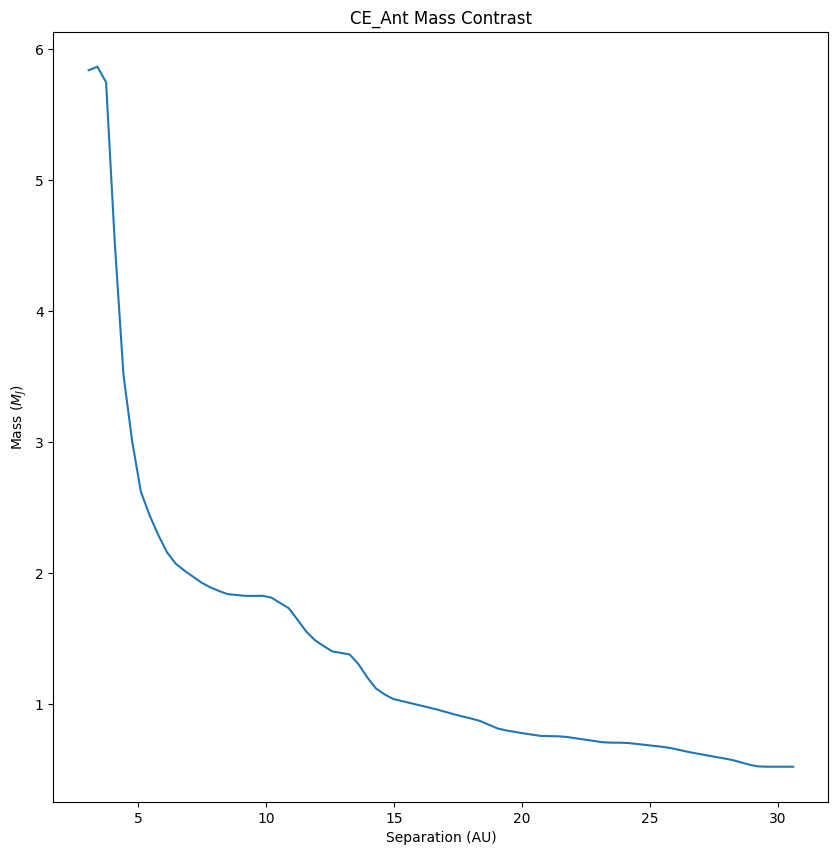

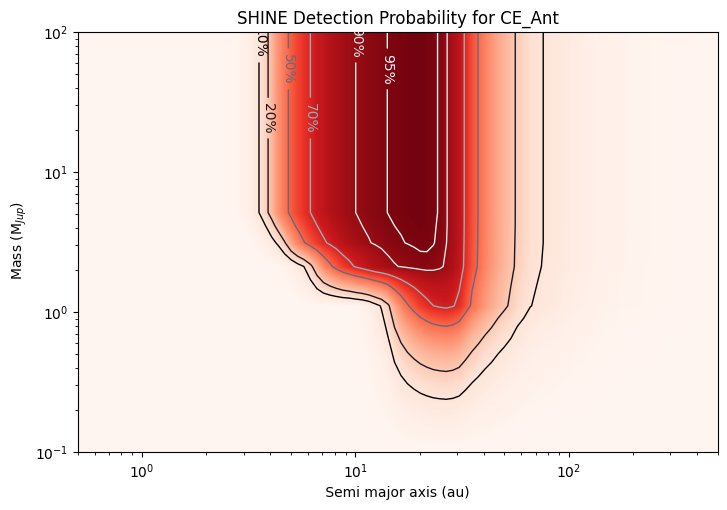

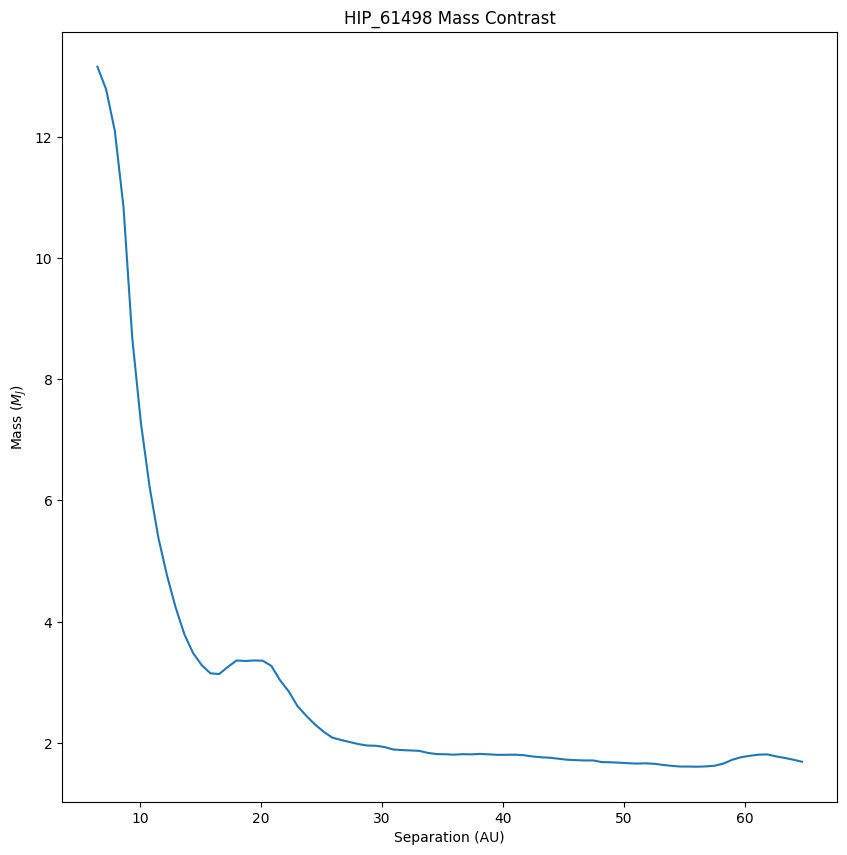

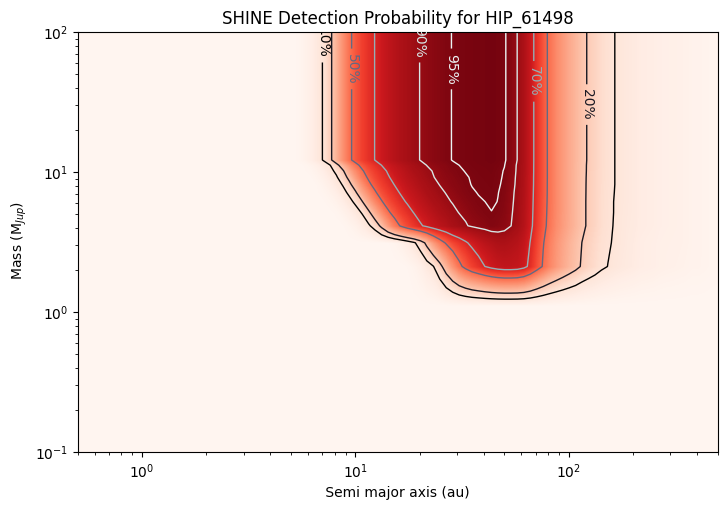

In [40]:
# test the plots for only F150 sample
import os
savefolder = "C:/Users/bryce/Python/High Contrast Imaging Project/Year_4/METIS_2023/SHINE/bpic_twa"

STAR = obj["ID"]
for i in range(len(star_list)):
    distance = float(obj["dist"][star_list[i]])
    x = obj["xlim"][star_list[i]] * distance
    y = obj["ylim"][star_list[i]]
    savefilename = STAR[star_list[i]]
    contrast = np.array([x,y])
    cont_file = os.path.join(savefolder, str(savefilename)+'_cont_data.txt')
    np.savetxt(cont_file, contrast)
    
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)
    ax.plot(x, y)
    ax.set_ylabel('Mass ($M_J$)')
    ax.set_xlabel('Separation (AU)')
    ax.set_title('{} Mass Contrast'.format(STAR[star_list[i]]))
    plt.savefig(str(savefolder)+'/'+str(savefilename)+'_curve.png', bbox_inches='tight')
    
    ID='SHINE Detection Probability for {}'.format(STAR[star_list[i]])
    dist = distance
    map=exodmc(ID, dist)
    map.set_grid(x_min=0.5, x_max=500, logx=True, y_min=0.1, y_max=100)
    xlim=x
    ylim=y
    prob = map.DImode(xlim, ylim, lxunit = 'au', savefig = False)
    det_prob = os.path.join(savefolder, str(savefilename)+'_detprob.txt')
    np.savetxt(det_prob, prob[0])
    plt.savefig(str(savefolder)+'/'+str(savefilename)+'_detprob.png', bbox_inches='tight')
    

In [38]:
a = np.linspace(0.5, 500, 100)
a

array([  0.5       ,   5.54545455,  10.59090909,  15.63636364,
        20.68181818,  25.72727273,  30.77272727,  35.81818182,
        40.86363636,  45.90909091,  50.95454545,  56.        ,
        61.04545455,  66.09090909,  71.13636364,  76.18181818,
        81.22727273,  86.27272727,  91.31818182,  96.36363636,
       101.40909091, 106.45454545, 111.5       , 116.54545455,
       121.59090909, 126.63636364, 131.68181818, 136.72727273,
       141.77272727, 146.81818182, 151.86363636, 156.90909091,
       161.95454545, 167.        , 172.04545455, 177.09090909,
       182.13636364, 187.18181818, 192.22727273, 197.27272727,
       202.31818182, 207.36363636, 212.40909091, 217.45454545,
       222.5       , 227.54545455, 232.59090909, 237.63636364,
       242.68181818, 247.72727273, 252.77272727, 257.81818182,
       262.86363636, 267.90909091, 272.95454545, 278.        ,
       283.04545455, 288.09090909, 293.13636364, 298.18181818,
       303.22727273, 308.27272727, 313.31818182, 318.36

In [39]:
a = np.geomspace(0.5, 500, 100)
a

array([  0.5       ,   0.53613361,   0.5748785 ,   0.61642337,
         0.66097057,   0.70873708,   0.75995554,   0.81487542,
         0.8737642 ,   0.93690871,   1.0046165 ,   1.07721735,
         1.15506485,   1.23853818,   1.32804389,   1.42401793,
         1.52692775,   1.63727458,   1.75559587,   1.8824679 ,
         2.01850863,   2.16438064,   2.32079442,   2.48851178,
         2.66834962,   2.86118383,   3.06795364,   3.28966612,
         3.52740116,   3.78231664,   4.05565415,   4.34874501,
         4.66301673,   5.        ,   5.36133611,   5.74878498,
         6.1642337 ,   6.60970574,   7.08737081,   7.59955541,
         8.14875417,   8.737642  ,   9.36908711,  10.04616501,
        10.77217345,  11.5506485 ,  12.38538178,  13.28043891,
        14.24017934,  15.26927754,  16.37274581,  17.55595867,
        18.82467903,  20.18508629,  21.64380641,  23.20794417,
        24.88511782,  26.68349616,  28.6118383 ,  30.67953637,
        32.89666123,  35.27401155,  37.82316638,  40.55